## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [2]:
# YOUR CODE HERE
# import libraries
import os
import pandas as pd
import html5lib
import matplotlib

# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [3]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
data_dir = 'C:/Users/TUDelft/TIL6010/Region_Mobility_Report_CSVs/'
country_code = 'NL'#just where I am studying


#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [4]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = ''
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year = file_name[0:4]
    # if yes, we check if the file name is for the country that you select
    if is_year==year:
        # check if the country_code is in the file_name
        is_country = file_name[5:7]
        if is_country==country_code:
            # found the file, save it to 'target_file_name'
            target_file_name = file_name
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = 'C:/Users/TUDelft/TIL6010/Region_Mobility_Report_CSVs/'+ target_file_name
    print('Path to the file is: ' + file_path)


Found file name is: 2020_NL_Region_Mobility_Report.csv
Path to the file is: C:/Users/TUDelft/TIL6010/Region_Mobility_Report_CSVs/2020_NL_Region_Mobility_Report.csv


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [5]:
# YOUR CODE HERE
f=open(file_path)
df_2020=pd.read_csv(f)

print(df_2020.tail(10))


       country_region_code country_region sub_region_1 sub_region_2  \
110231                  NL    Netherlands      Zeeland        Veere   
110232                  NL    Netherlands      Zeeland        Veere   
110233                  NL    Netherlands      Zeeland        Veere   
110234                  NL    Netherlands      Zeeland        Veere   
110235                  NL    Netherlands      Zeeland        Veere   
110236                  NL    Netherlands      Zeeland        Veere   
110237                  NL    Netherlands      Zeeland        Veere   
110238                  NL    Netherlands      Zeeland        Veere   
110239                  NL    Netherlands      Zeeland        Veere   
110240                  NL    Netherlands      Zeeland        Veere   

        metro_area iso_3166_2_code  census_fips_code  \
110231         NaN             NaN               NaN   
110232         NaN             NaN               NaN   
110233         NaN             NaN               N

#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [6]:
# YOUR CODE HERE
yy='/2021'
cc='/NL'
fs='http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data'+yy+cc
df_2021=pd.read_csv(fs,sep=',',header='infer')
#df_2021_r=pd.read_fwf(fs,encoding='utf-8')
#df_2021=pd.DataFrame(df_2021_r['country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline'].str.split(",",expand=True))
#df_2021=df_2021.drop(df_2021.columns[15],axis=1)
print(df_2021.tail(10))

      country_region_code country_region sub_region_1 sub_region_2  \
88539                  NL    Netherlands      Zeeland        Veere   
88540                  NL    Netherlands      Zeeland        Veere   
88541                  NL    Netherlands      Zeeland        Veere   
88542                  NL    Netherlands      Zeeland        Veere   
88543                  NL    Netherlands      Zeeland        Veere   
88544                  NL    Netherlands      Zeeland        Veere   
88545                  NL    Netherlands      Zeeland        Veere   
88546                  NL    Netherlands      Zeeland        Veere   
88547                  NL    Netherlands      Zeeland        Veere   
88548                  NL    Netherlands      Zeeland        Veere   

       metro_area iso_3166_2_code  census_fips_code  \
88539         NaN             NaN               NaN   
88540         NaN             NaN               NaN   
88541         NaN             NaN               NaN   
88542    

#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [7]:
# YOUR CODE HERE
df=pd.merge(df_2020,df_2021,how='outer')
#df=df_2020.append(df_2021)
#df=df_2020.join(df_2021)
#df=pd.concat([df_2021,df_2020])
#df1=df.drop(df.columns[0:15],axis=1)
print(df.tail(10))

       country_region_code country_region sub_region_1 sub_region_2  \
198780                  NL    Netherlands      Zeeland        Veere   
198781                  NL    Netherlands      Zeeland        Veere   
198782                  NL    Netherlands      Zeeland        Veere   
198783                  NL    Netherlands      Zeeland        Veere   
198784                  NL    Netherlands      Zeeland        Veere   
198785                  NL    Netherlands      Zeeland        Veere   
198786                  NL    Netherlands      Zeeland        Veere   
198787                  NL    Netherlands      Zeeland        Veere   
198788                  NL    Netherlands      Zeeland        Veere   
198789                  NL    Netherlands      Zeeland        Veere   

        metro_area iso_3166_2_code  census_fips_code  \
198780         NaN             NaN               NaN   
198781         NaN             NaN               NaN   
198782         NaN             NaN               N

#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [8]:
# YOUR CODE HERE
df_N=df['sub_region_1'].isna() & df['sub_region_2'].isna()
df_P=df['sub_region_1'].isna() ^ df['sub_region_2'].isna()
df_CA=df['sub_region_1'].isna()==False 
df_CB=df[df_CA]
df_C=df_CB['sub_region_2'].isna()==False 
df_D=[df['sub_region_1'].isna() ]
#print(df_C)
df_nation=df[df_N]
df_province=df[df_P]
df_city=df_CB[df_C]
print(type(df_nation))

<class 'pandas.core.frame.DataFrame'>


#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [9]:
# YOUR CODE HERE
df_nation.to_csv(r'C:\Users\shiyu'+cc+'_nation.csv')
df_province.to_csv(r'C:\Users\shiyu'+cc+'_province.csv')
df_city.to_csv(r'C:\Users\shiyu'+cc+'_city.csv')
#df_nation.to_csv(data_dir+cc+'_nation.csv')

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [10]:
# YOUR CODE HERE
ind=df_nation.columns
#print(ind)
mean_dict={}
for i in range(9,15):
    mean_dict[ind[i]]=df_nation[ind[i]].mean()
#meanc=df_nation['retail_and_recreation_percent_change_from_baseline'].mean()
print(mean_dict)

{'retail_and_recreation_percent_change_from_baseline': -21.038938053097347, 'grocery_and_pharmacy_percent_change_from_baseline': -1.1061946902654867, 'parks_percent_change_from_baseline': 74.98761061946902, 'transit_stations_percent_change_from_baseline': -40.83716814159292, 'workplaces_percent_change_from_baseline': -25.191150442477877, 'residential_percent_change_from_baseline': 8.375221238938053}


#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [11]:
# YOUR CODE HERE
prolist=[]
for pros in df_province['sub_region_1']:
    if pros not in prolist:
        prolist.append(pros)
print(prolist)

['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 'Limburg', 'North Brabant', 'North Holland', 'Overijssel', 'South Holland', 'Utrecht', 'Zeeland']


#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [12]:
# YOUR CODE HERE
meanWpro={}
meanWproV=[]
for pros in prolist:
    dfp0=df_province[df_province['sub_region_1']==pros]
    meanWpro[dfp0['workplaces_percent_change_from_baseline'].mean()]=pros
    meanWproV.append(dfp0['workplaces_percent_change_from_baseline'].mean())
meanWproV.sort()
print(meanWproV)
lwcp=meanWpro[meanWproV[0]]
print(lwcp)

[-29.81061946902655, -29.624778761061947, -26.939823008849558, -26.530249110320284, -25.41061946902655, -24.27787610619469, -22.597864768683273, -22.405309734513274, -21.831858407079647, -21.71858407079646, -21.253097345132744, -20.368327402135233]
Utrecht


#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [13]:
# YOUR CODE HERE
df_lwcp=df_province[df_province['sub_region_1']==lwcp]
print(df_lwcp)

       country_region_code country_region sub_region_1 sub_region_2  \
98786                   NL    Netherlands      Utrecht          NaN   
98787                   NL    Netherlands      Utrecht          NaN   
98788                   NL    Netherlands      Utrecht          NaN   
98789                   NL    Netherlands      Utrecht          NaN   
98790                   NL    Netherlands      Utrecht          NaN   
...                    ...            ...          ...          ...   
189745                  NL    Netherlands      Utrecht          NaN   
189746                  NL    Netherlands      Utrecht          NaN   
189747                  NL    Netherlands      Utrecht          NaN   
189748                  NL    Netherlands      Utrecht          NaN   
189749                  NL    Netherlands      Utrecht          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
98786          NaN           NL-UT               NaN   
98787          NaN           NL-UT 

#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [14]:
# YOUR CODE HERE
import datetime
cdte=[]
for dates in df_lwcp['date']:
    cdate=datetime.datetime.strptime(dates,'%Y-%m-%d')
    #df_lwcp['date2']=cdate
    cdte.append(cdate)
#print(cdte)
df_lwcp['date2']=cdte
print(df_lwcp)

       country_region_code country_region sub_region_1 sub_region_2  \
98786                   NL    Netherlands      Utrecht          NaN   
98787                   NL    Netherlands      Utrecht          NaN   
98788                   NL    Netherlands      Utrecht          NaN   
98789                   NL    Netherlands      Utrecht          NaN   
98790                   NL    Netherlands      Utrecht          NaN   
...                    ...            ...          ...          ...   
189745                  NL    Netherlands      Utrecht          NaN   
189746                  NL    Netherlands      Utrecht          NaN   
189747                  NL    Netherlands      Utrecht          NaN   
189748                  NL    Netherlands      Utrecht          NaN   
189749                  NL    Netherlands      Utrecht          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
98786          NaN           NL-UT               NaN   
98787          NaN           NL-UT 

c:\users\shiyu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [15]:
# YOUR CODE HERE
df_province_largest=df_lwcp.sort_values('date2')
print(df_province_largest)

       country_region_code country_region sub_region_1 sub_region_2  \
98786                   NL    Netherlands      Utrecht          NaN   
98787                   NL    Netherlands      Utrecht          NaN   
98788                   NL    Netherlands      Utrecht          NaN   
98789                   NL    Netherlands      Utrecht          NaN   
98790                   NL    Netherlands      Utrecht          NaN   
...                    ...            ...          ...          ...   
189745                  NL    Netherlands      Utrecht          NaN   
189746                  NL    Netherlands      Utrecht          NaN   
189747                  NL    Netherlands      Utrecht          NaN   
189748                  NL    Netherlands      Utrecht          NaN   
189749                  NL    Netherlands      Utrecht          NaN   

        metro_area iso_3166_2_code  census_fips_code  \
98786          NaN           NL-UT               NaN   
98787          NaN           NL-UT 

<AxesSubplot:xlabel='date'>

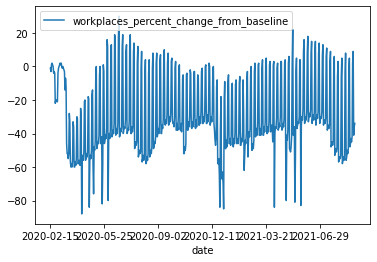

In [16]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date', 'workplaces_percent_change_from_baseline')



<AxesSubplot:xlabel='date2'>

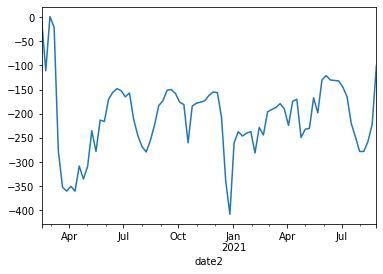

In [17]:
df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)